<a href="https://colab.research.google.com/github/Bindhu-03/Uber-data-analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
dataset.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [8]:
dataset.shape

(1156, 7)

# Data Preprocessing

In [9]:
dataset.isna().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [10]:
dataset['PURPOSE'].fillna("N/A", inplace=True)

<ipython-input-10-bad7ba19f517>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("N/A", inplace=True)


In [11]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,N/A
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [12]:
#change the date format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


### creating seperate columns from date and time

In [16]:
from datetime import datetime

dataset['DATE'] = pd.DatetimeIndex(dataset['START_DATE']).date

In [18]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,N/A,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


In [20]:
dataset['TIME'] = pd.DatetimeIndex(dataset["START_DATE"]).hour
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,N/A,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [22]:
dataset['Times_of_day'] = pd.cut(x = dataset['TIME'], bins = [0, 10, 15, 19, 24], labels = ['Morning','Afternoon','Evening','Night'])

In [23]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Times_of_day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,N/A,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN,NaN


In [24]:
dataset.dropna(inplace=True)

In [25]:
dataset.isna().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0
DATE,0
TIME,0
Times_of_day,0


In [26]:
dataset.shape

(413, 10)

#DATA VISUALIZATION

In [27]:
#let's see which category books more Uber rides
dataset['CATEGORY'].value_counts()

,count
CATEGORY,
Business,400
Personal,13


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

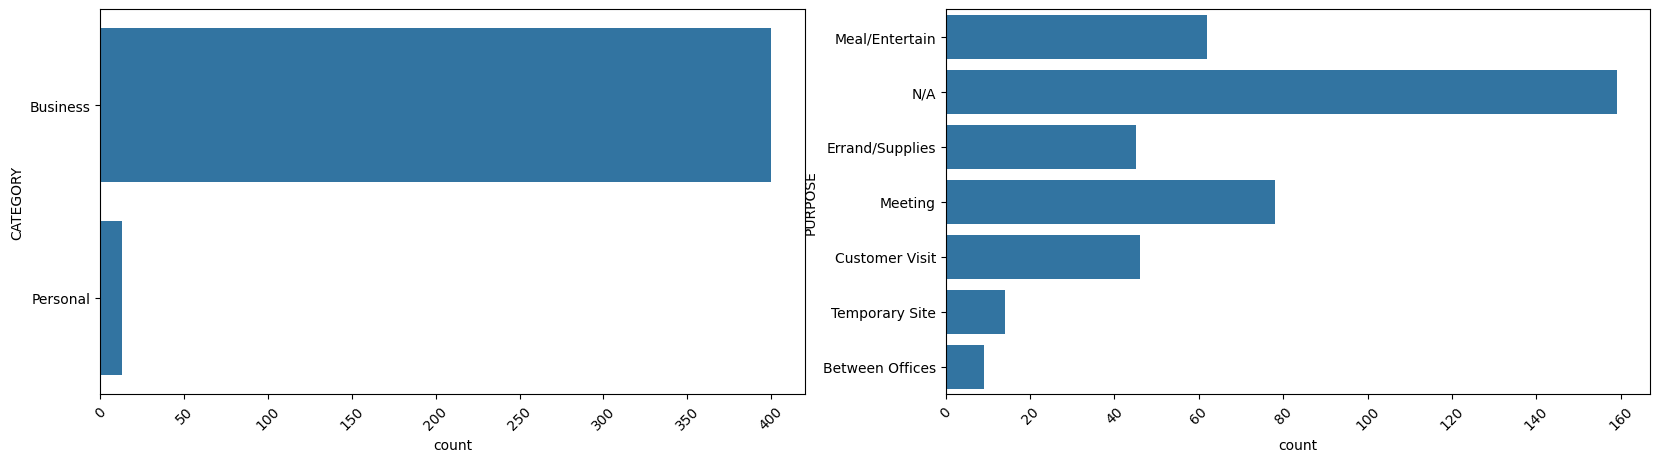

In [32]:
#using data visualization
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)

sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation = 45)

From the above graph, we can conclude that **Business category** people uses more Uber rides when compared to Personal category.

And most the peoplebook their Uber rides for **Meeting Purpose**

<Axes: xlabel='count', ylabel='Times_of_day'>

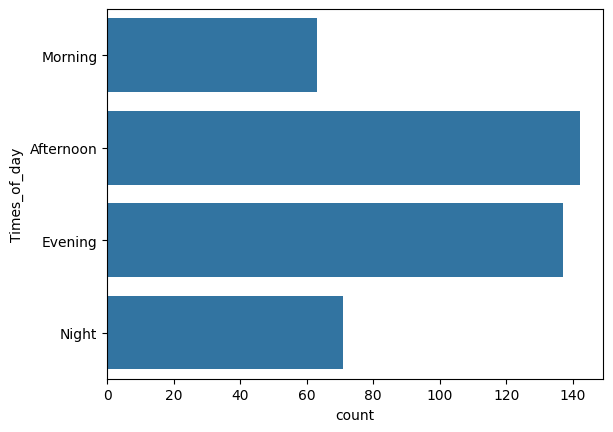

In [33]:
#At what time moset of the people book their Uber rides
sns.countplot(dataset['Times_of_day'])

Maximum UBER rides are being booked in the **Afternoon time and Evening time**

In [35]:
#In which months do people book Uber rides less frequently?

#create a column for month

#extracting month column from START_TIME column
dataset["MONTH"] = pd.DatetimeIndex(dataset['START_DATE']).month



In [37]:
#Assinging string names to months
month_label = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [39]:
dataset["MONTH"] = dataset.MONTH.map(month_label) #Replacing no.of months with string names

In [42]:
mon = dataset.MONTH.value_counts(sort = False) #calculating count of each month

[Text(0.5, 0, 'MONTH'), Text(0, 0.5, 'VALUE COUNT')]

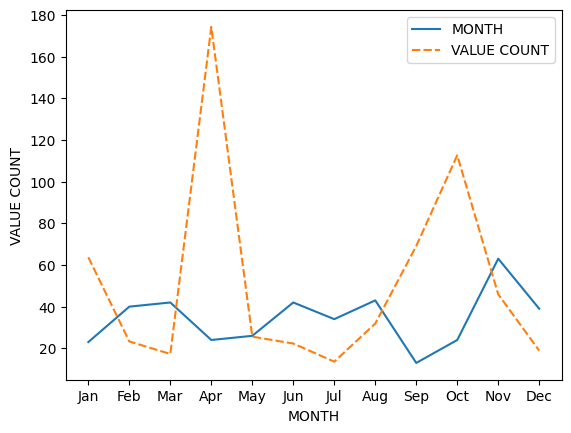

In [43]:
df = pd.DataFrame({
    "MONTH":mon.values,
    "VALUE COUNT": dataset.groupby("MONTH", sort = False)["MILES"].max()
})
p = sns.lineplot(data = df)
p.set(xlabel = "MONTH", ylabel = "VALUE COUNT")

In ** Jan, Nov, Dec ** people book Uber rides less frequently

In [ ]:
# ON which days of the weeks do people book Uber rides the most

In [46]:
#create a column for week
dataset['DAY'] = dataset['START_DATE'].dt.weekday

day_label = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
dataset['DAY'] = dataset['DAY'].map(day_label)

In [47]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Times_of_day,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,N/A,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon,Dec,Monday
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon,Dec,Monday
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,Dec,Monday
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,Dec,Monday


In [48]:
dataset['DAY'].value_counts()

,count
DAY,
Friday,86
Thursday,61
Monday,61
Tuesday,58
Saturday,52
Wednesday,48
Sunday,47


<Axes: xlabel='count', ylabel='DAY'>

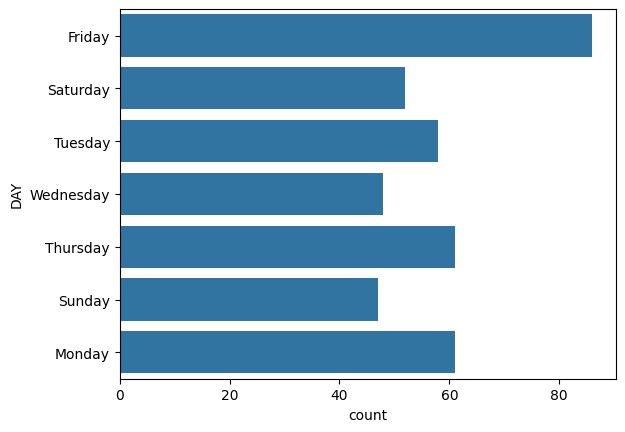

In [49]:
sns.countplot(dataset['DAY'])

Text(0, 0.5, 'count')

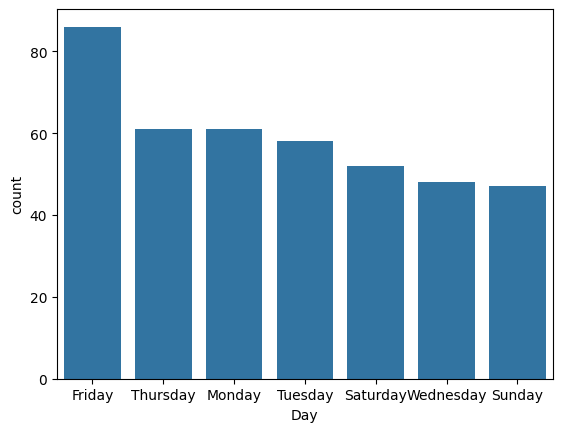

In [53]:
day_label = dataset.DAY.value_counts()
sns.barplot(x = day_label.index, y = day_label)
plt.xlabel("Day")
plt.ylabel("count")


On **Friday** people book most of their Uber rides

In [54]:
#Finding the total number of miles do people usually book a cab through Uber

In [55]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Times_of_day,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,N/A,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


<Axes: ylabel='MILES'>

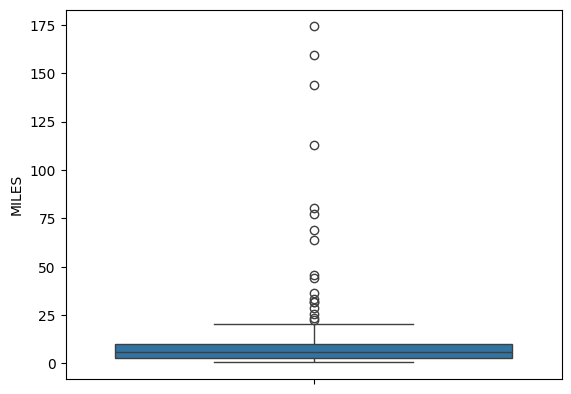

In [56]:
sns.boxplot(dataset["MILES"])

<Axes: ylabel='MILES'>

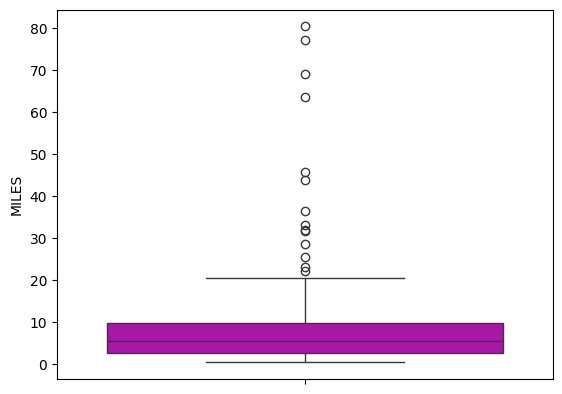

In [59]:
sns.boxplot(dataset[dataset["MILES"]<100]['MILES'], color = "m")

<Axes: ylabel='MILES'>

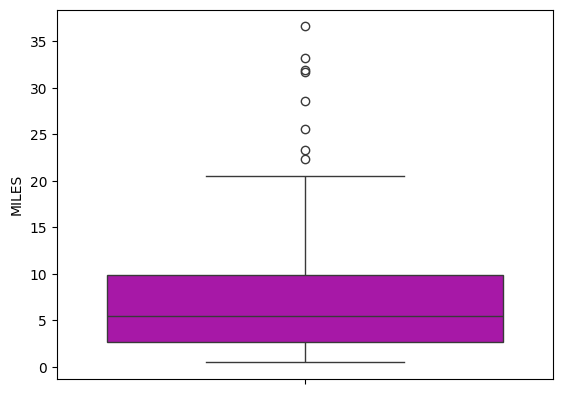

In [60]:
# i want to see only until 40 on y-axis
sns.boxplot(dataset[dataset["MILES"]<40]['MILES'], color = "m")

<ipython-input-62-2f649093b70a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset["MILES"]<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

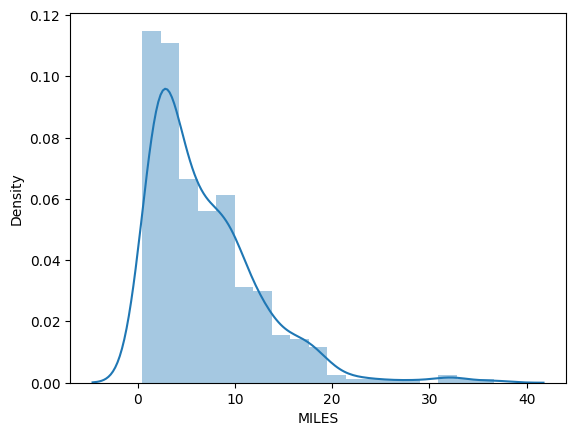

In [62]:
sns.distplot(dataset[dataset["MILES"]<40]['MILES'])

People book their rides to travel around nearly **20miles**